# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 4</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

L'esercizio richiede di effettuare una simulazione di dinamica molecolare nell'ensamble microcanonico (NVE) di un modello di Lennard-Jones di 108 molecole di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
1. fase solida:  $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

e di stimare l'energia interna totale per molecola, $E/N$, l'energia potenziale per molecola, $U/N$, l'energia cinetica per molecola, $K/N$, la temperatura $T$ e la pressione $P$.


### Fase solida 
##### $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)

#### Equilibrazione
La simulazione parte da una configurazione iniziale delle posizioni delle 108 molecole su di un reticolo fcc 3D ad una data temperatura. Per studiare il sistema nelle condizioni richiese, devo preliminarmente studiare in quanto tempo è raggiunto l'equilibrio e a che temperatura iniziale devo avviare la simulazione, in modo che all'equilibrio venga raggiunta la temperatura $T^{*}$ in cui è richiesto di effettuare le misure. 

Effettuando simulazioni con 4000 blocchi aventi ciascuno un'unica iterazione, visualizzando le temperature istantanee (cioè la misura di temperatura ad ogni step), ho individuato come temperatura iniziale $T^{*}_{in}=1.543$ che permetta di raggiungere all'equilibrio la temperatura $T^{*}=0.8$.

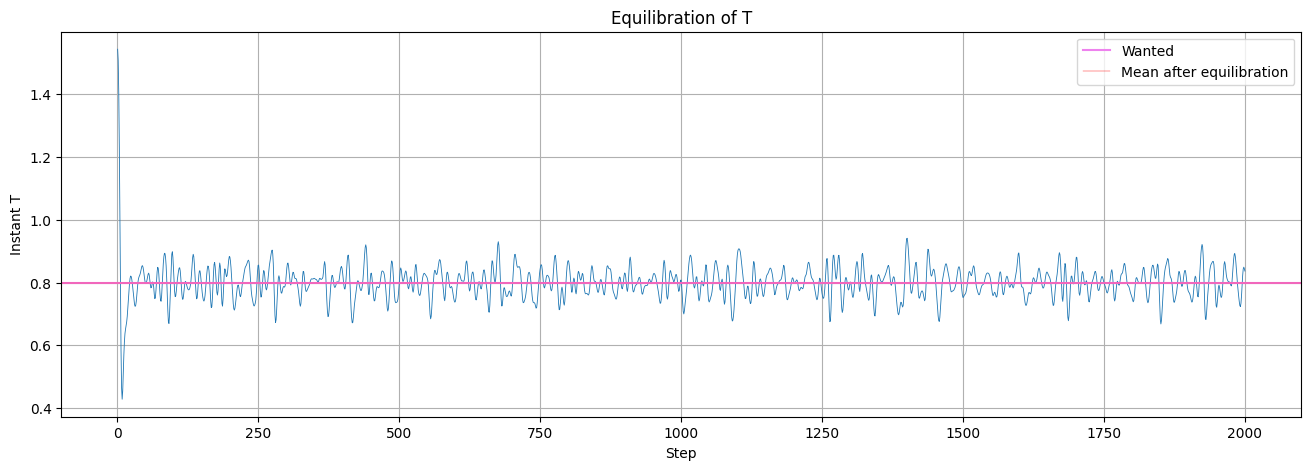

In [93]:
# Carica i dati dal file
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/temperature.dat", usecols=(0, 1), unpack=True)

# Crea una figura con dimensioni maggiori
plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati
plt.plot(step[:2000], stima_temp[:2000], lw=0.6)
plt.axhline(0.8, color='violet', label='Wanted')
plt.axhline(np.mean(stima_temp[1000:]), color='red', lw=0.3, label='Mean after equilibration')
plt.xlabel('Step')
plt.ylabel('Instant T')
plt.title('Equilibration of T')
plt.grid(True)

plt.legend()

# Mostra il grafico
plt.show()

Visualizzando le misure istantanee di tutte le quantità da misurare, ho individuato come tempo di equilibrazione (sovrabbondante) $N_{eq}=1000$.

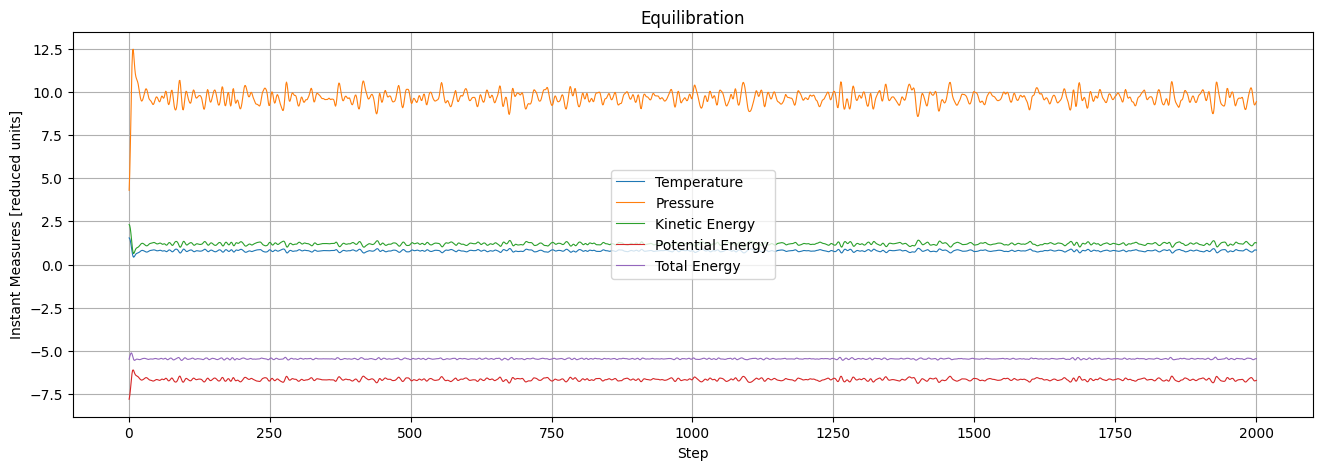

In [3]:
# Carica i dati dal primo file (temperature.dat)
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/temperature.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_press = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/pressure.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_kin = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/kinetic_energy.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_pot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/potential_energy.dat", usecols=(0, 1), unpack=True)
# Crea una figura con dimensioni maggiori
# Carica i dati dal secondo file (pressure.dat)
step, stima_tot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/SOLID/total_energy.dat", usecols=(0, 1), unpack=True)


plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati di temperature
plt.plot(step[:2000], stima_temp[:2000], label='Temperature', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_press[:2000], label='Pressure', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_kin[:2000], label='Kinetic Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_pot[:2000], label='Potential Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_tot[:2000], label='Total Energy', lw=0.8)

# Aggiungi etichette e titolo
plt.xlabel('Step')
plt.ylabel('Instant Measures [reduced units]')
plt.title('Equilibration')
plt.grid(True)

# Aggiungi una legenda
plt.legend(loc='center')

# Mostra il grafico
plt.show()

#### Simulazione

Individuata la condizione iniziale di temperatura $T^{*}_{in}=1.543$ necessaria a raggiungere all'equilibrio $T^{*}=0.8$ ed individuato il tempo di equilibrazione $N_{eq}=1000$ che permetta al sistema di raggiungere l'equilibrio, ho effettuato una simulazione come segue:
- $N_{eq}=1000$ step senza effettuare misure, con il solo scopo di raggiungere l'equilibrio:
  ```cpp
      int t_equilibration = 1000;
      for (int i=0; i<t_equilibration; i++) SYS.step();
- misure suddivise in 20 blocchi da 2000 step ciascuno, a partire dalla configurazione raggiunta al termine della fase di equilibrazione.

Sono mostrati i risultati ottenuti.

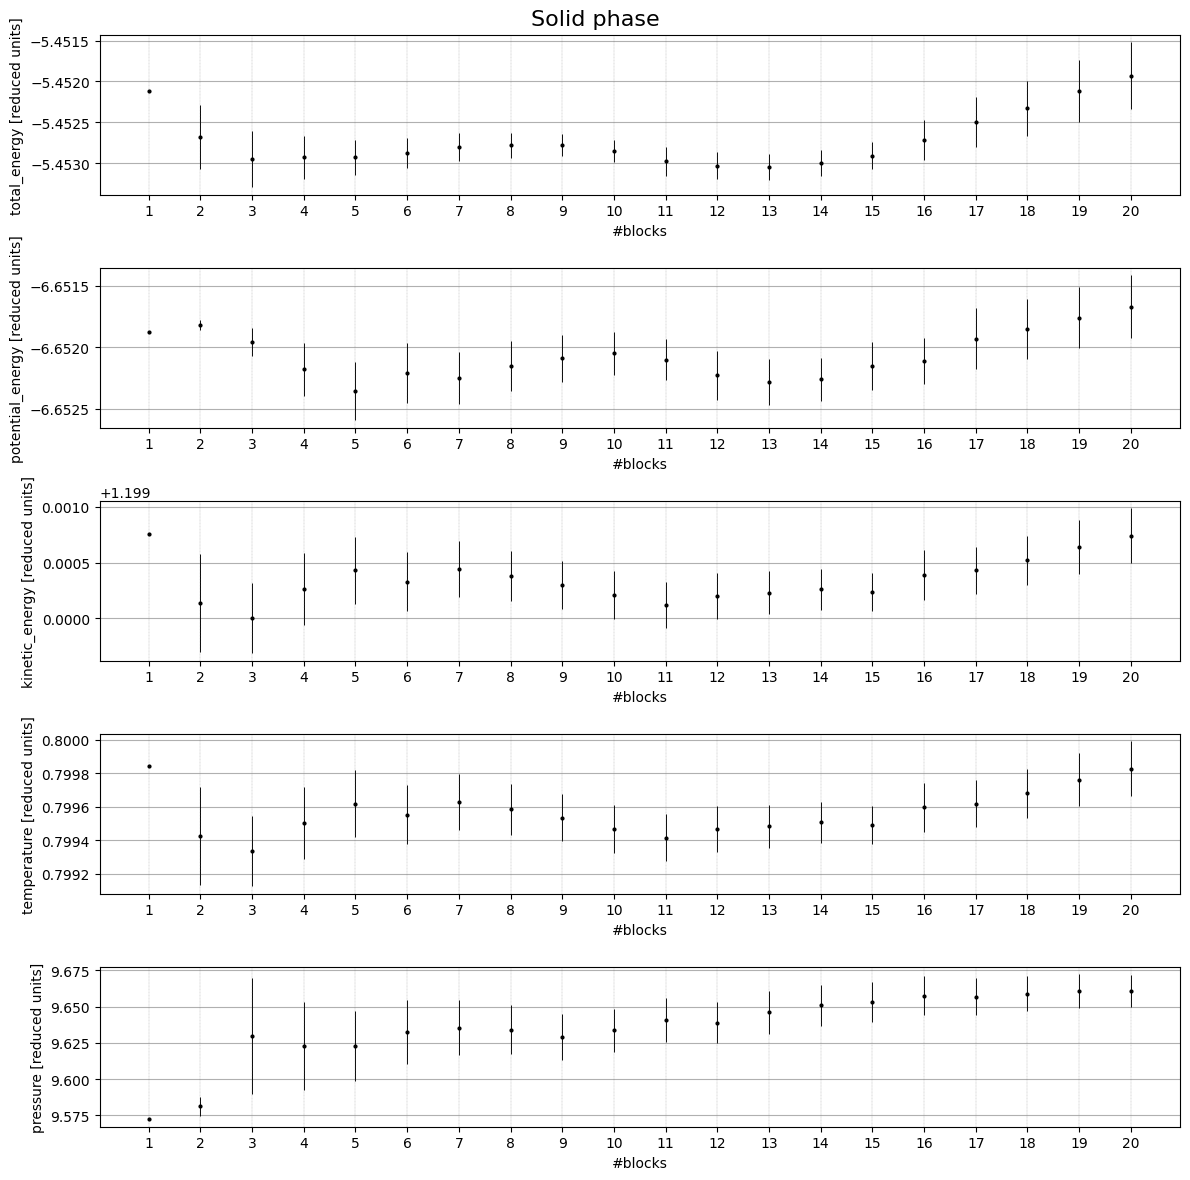

In [54]:
def load_data(file_path):
    blk, data, error = np.loadtxt(file_path, usecols=(0, 2, 3), unpack=True)
    return blk, data, error

# Define file paths
file_paths = ["OUTPUT/SOLID/total_energy.dat", 
              "OUTPUT/SOLID/potential_energy.dat", 
              "OUTPUT/SOLID/kinetic_energy.dat", 
              "OUTPUT/SOLID/temperature.dat", 
              "OUTPUT/SOLID/pressure.dat"]

# Load data and create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 12))

for i, file_path in enumerate(file_paths):
    blk, data, error = load_data(file_path)
    axs[i].errorbar(blk, data, yerr=error, fmt='o', markersize=2, color='black', ecolor='black', linewidth=0.7)
    axs[i].set_xlabel('#blocks')
    axs[i].set_ylabel(file_path.split('/')[-1].split('.')[0] + ' [reduced units]')
    axs[i].grid(True, axis='y')  # Set grid only on y-axis
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set x-axis to show only integer values
    
    # Add vertical lines on integer values of x-axis
    for value in blk:
        axs[i].axvline(x=value, color='gray', linestyle='--', linewidth=0.2)
    
    # Set integer tick labels on the x-axis
    axs[i].set_xticks(blk)
    axs[i].set_xticklabels([int(x) for x in blk])

fig.suptitle('Solid phase', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Fase liquida
##### $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)

##### Equilibrazione

Seguendo lo stesso procedimento seguito per la fase solida, ho individuato $T^{*}_{in}=1.979$ che mi permetta di raggiungere all'equilibrio $T*=1.1$ e ho individuato il tempo $N_{eq}=1000$ (anche in questo caso abbondando) necessario a raggiungere l'equilibrio.

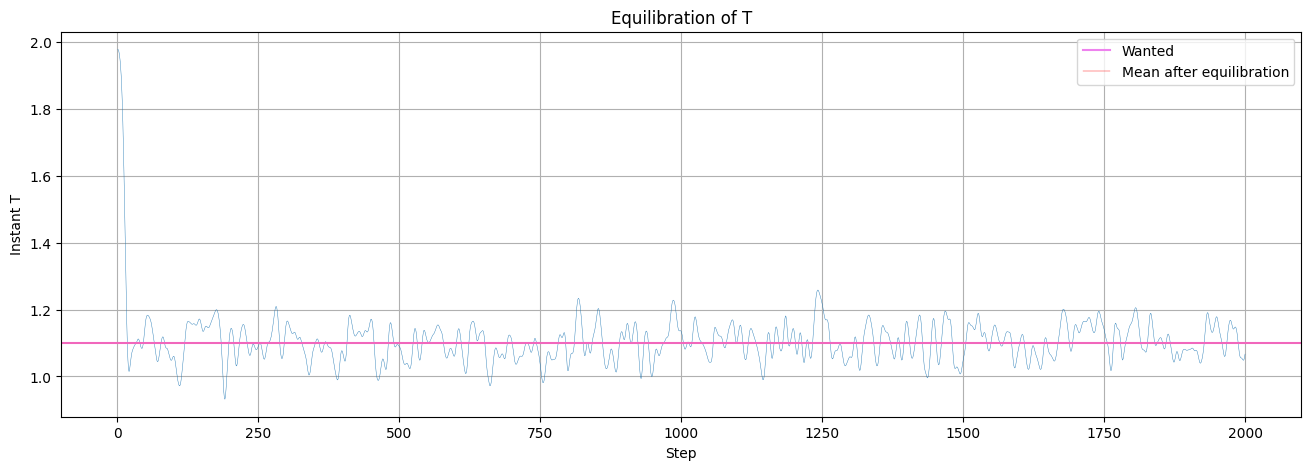

In [75]:
# Carica i dati dal file
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/temperature.dat", usecols=(0, 1), unpack=True)

# Crea una figura con dimensioni maggiori
plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati
plt.plot(step[:2000], stima_temp[:2000], lw=0.3)
plt.axhline(1.1, color='violet', label='Wanted')
plt.axhline(np.mean(stima_temp[1000:]), color='red', lw=0.3, label='Mean after equilibration')
plt.xlabel('Step')
plt.ylabel('Instant T')
plt.title('Equilibration of T')
plt.grid(True)

plt.legend()

# Mostra il grafico
plt.show()

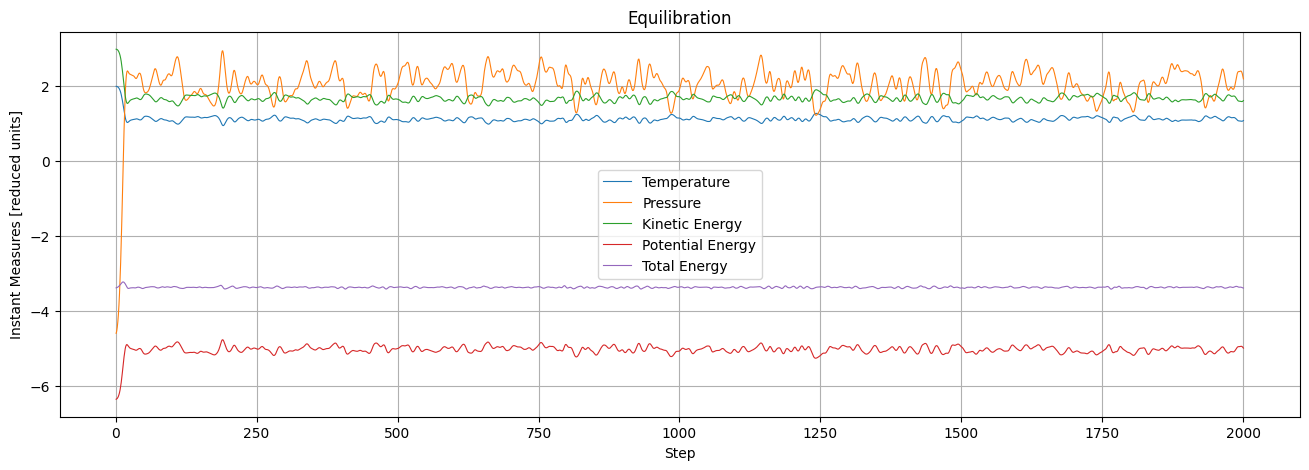

In [57]:
# Carica i dati dal primo file (temperature.dat)
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/temperature.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_press = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/pressure.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_kin = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/kinetic_energy.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_pot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/potential_energy.dat", usecols=(0, 1), unpack=True)
# Crea una figura con dimensioni maggiori
# Carica i dati dal secondo file (pressure.dat)
step, stima_tot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/LIQUID/total_energy.dat", usecols=(0, 1), unpack=True)


plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati di temperature
plt.plot(step[:2000], stima_temp[:2000], label='Temperature', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_press[:2000], label='Pressure', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_kin[:2000], label='Kinetic Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_pot[:2000], label='Potential Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step[:2000], stima_tot[:2000], label='Total Energy', lw=0.8)

# Aggiungi etichette e titolo
plt.xlabel('Step')
plt.ylabel('Instant Measures [reduced units]')
plt.title('Equilibration')
plt.grid(True)

# Aggiungi una legenda
plt.legend(loc='center')

# Mostra il grafico
plt.show()

#### Simulazione

Come per la fase solida, individuata la condizione iniziale di temperatura $T^{*}_{in}=1.979$ necessaria a raggiungere all'equilibrio $T^{*}=1.1$ ed individuato il tempo di equilibrazione $N_{eq}=1000$ che permetta al sistema di raggiungere l'equilibrio, ho effettuato una simulazione come segue:
- $N_{eq}=1000$ step senza effettuare misure, con il solo scopo di raggiungere l'equilibrio:
  ```cpp
      int t_equilibration = 1000;
      for (int i=0; i<t_equilibration; i++) SYS.step();
- misure suddivise in 20 blocchi da 2000 step ciascuno, a partire dalla configurazione raggiunta al termine della fase di equilibrazione.

Sono mostrati i risultati ottenuti.

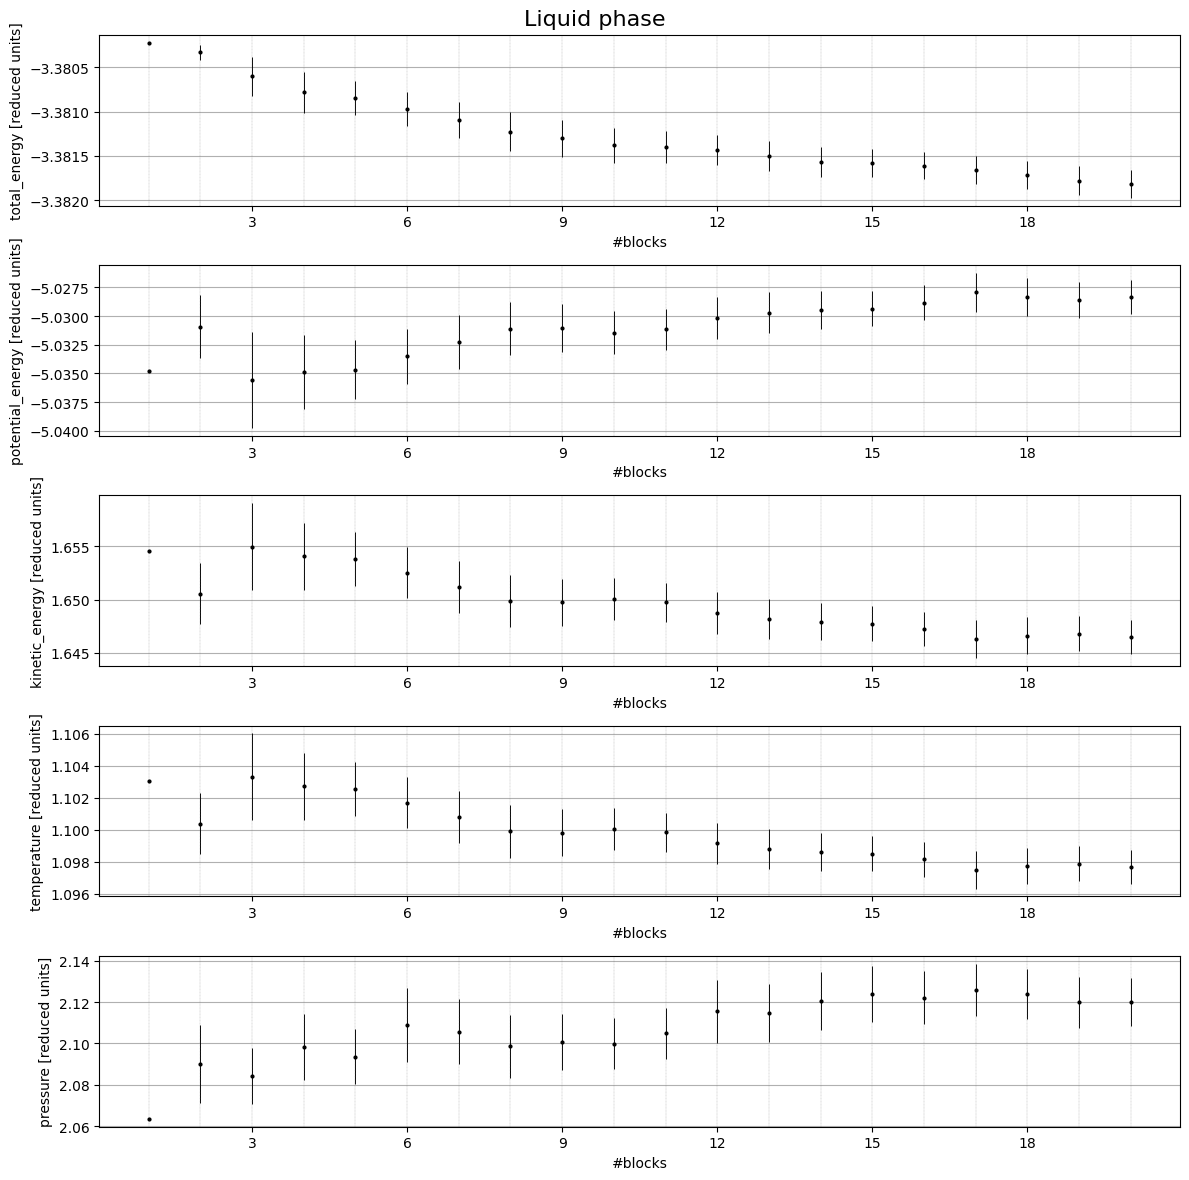

In [59]:
def load_data(file_path):
    blk, data, error = np.loadtxt(file_path, usecols=(0, 2, 3), unpack=True)
    return blk, data, error

# Define file paths
file_paths = ["OUTPUT/LIQUID/total_energy.dat", 
              "OUTPUT/LIQUID/potential_energy.dat", 
              "OUTPUT/LIQUID/kinetic_energy.dat", 
              "OUTPUT/LIQUID/temperature.dat", 
              "OUTPUT/LIQUID/pressure.dat"]

# Load data and create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 12))

for i, file_path in enumerate(file_paths):
    blk, data, error = load_data(file_path)
    axs[i].errorbar(blk, data, yerr=error, fmt='o', markersize=2, color='black', ecolor='black', linewidth=0.7)
    axs[i].set_xlabel('#blocks')
    axs[i].set_ylabel(file_path.split('/')[-1].split('.')[0] + ' [reduced units]')
    axs[i].grid(True, axis='y')  # Set grid only on y-axis
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set x-axis to show only integer values
    
    # Add vertical lines on integer values of x-axis
    for value in blk:
        axs[i].axvline(x=value, color='gray', linestyle='--', linewidth=0.2)

fig.suptitle('Liquid phase', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Fase gassosa
##### $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

#### Equilibrazione

##### Partendo da reticolo fcc 3D

Ho seguito lo stesso procedimento presentato per le altre due fasi. In questo caso, ho però effettuato $10000$ step, partendo dalla temperatura di equilibrio $T^{*}_{in}=0.950$. Rispetto alle due fasi precedenti, la discrepanza tra $T^{*}$ e la temperatura di equilibrio raggiunta dal sistema è però maggiore.

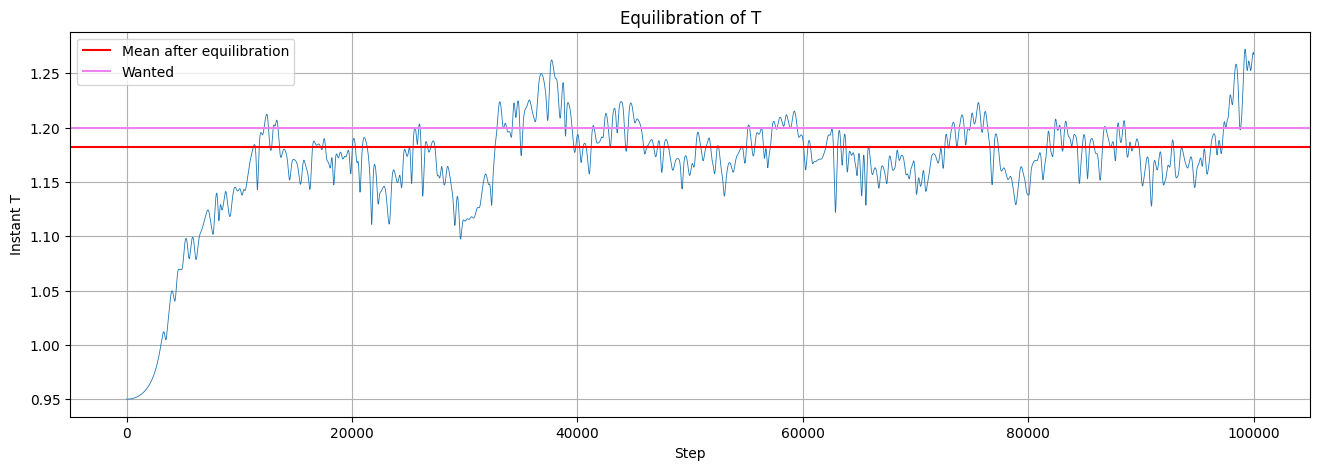

In [78]:
# Carica i dati dal file
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/temperature.dat", usecols=(0, 1), unpack=True)

# Crea una figura con dimensioni maggiori
plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati
plt.plot(step, stima_temp, lw=0.6)
plt.axhline(np.mean(stima_temp[30000:]), color='red', label='Mean after equilibration')
plt.axhline(1.2, color='violet', label='Wanted')

plt.xlabel('Step')
plt.ylabel('Instant T')
plt.title('Equilibration of T')
plt.grid(True)

plt.legend()

# Mostra il grafico
plt.show()

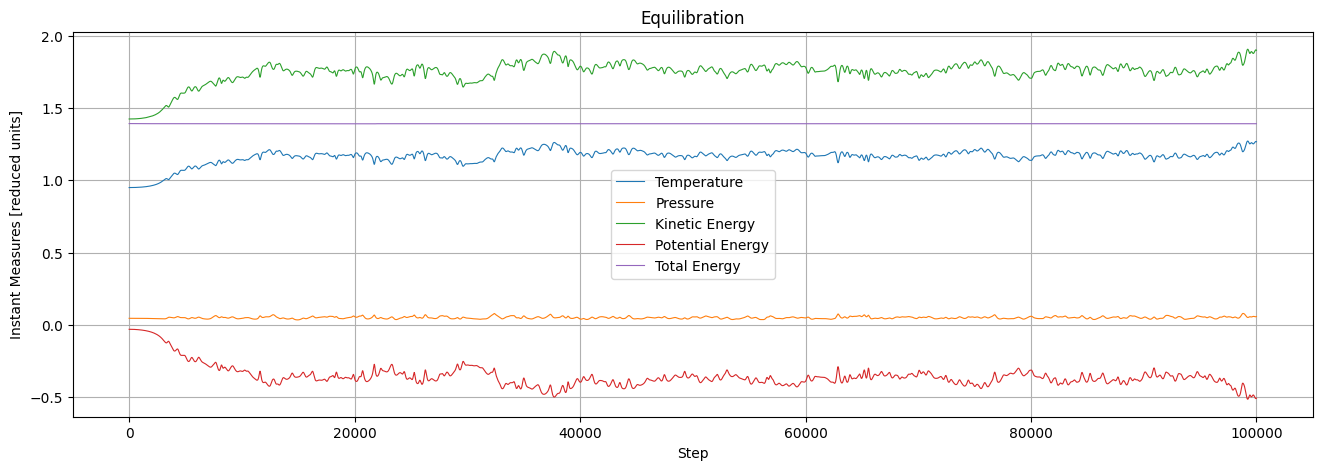

In [79]:
# Carica i dati dal primo file (temperature.dat)
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/temperature.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_press = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/pressure.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_kin = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/kinetic_energy.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_pot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/potential_energy.dat", usecols=(0, 1), unpack=True)
# Crea una figura con dimensioni maggiori
# Carica i dati dal secondo file (pressure.dat)
step, stima_tot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/total_energy.dat", usecols=(0, 1), unpack=True)


plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati di temperature
plt.plot(step, stima_temp, label='Temperature', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_press, label='Pressure', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_kin, label='Kinetic Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_pot, label='Potential Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_tot, label='Total Energy', lw=0.8)

# Aggiungi etichette e titolo
plt.xlabel('Step')
plt.ylabel('Instant Measures [reduced units]')
plt.title('Equilibration')
plt.grid(True)

# Aggiungi una legenda
plt.legend(loc='center')

# Mostra il grafico
plt.show()

#### Equilibrazione

##### Partendo da configurazione raggiunta dalla fase liquida al termine della simulazione sopra presentata
Ho ripetuto la fase di equilibrazione impostando come configurazione iniziale di partenza delle molecole, la configurazione finale raggiunta nella simulazione delle fase liquide, per capire se il sistema riuscisse più facilmente a raggiungere l'equilibrio nella fase gassosa. Non ho però riscontrato particolari differenze.

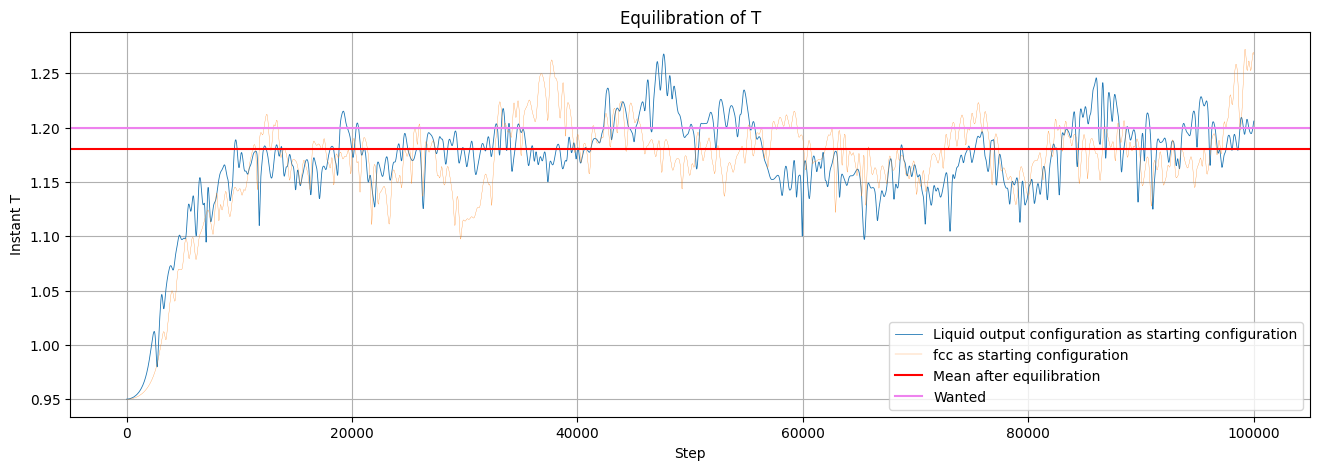

In [86]:
# Carica i dati dal file
step, stima_temp_new_init = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/temperature.dat", usecols=(0, 1), unpack=True)
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS/temperature.dat", usecols=(0, 1), unpack=True)
# Crea una figura con dimensioni maggiori
plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati
plt.plot(step, stima_temp_new_init, lw=0.6, label='Liquid output configuration as starting configuration')
plt.plot(step, stima_temp, lw=0.2, label='fcc as starting configuration')
plt.axhline(np.mean(stima_temp_new_init[30000:]), color='red', label='Mean after equilibration')
plt.axhline(1.2, color='violet', label='Wanted')

plt.xlabel('Step')
plt.ylabel('Instant T')
plt.title('Equilibration of T')
plt.grid(True)

plt.legend()

# Mostra il grafico
plt.show()

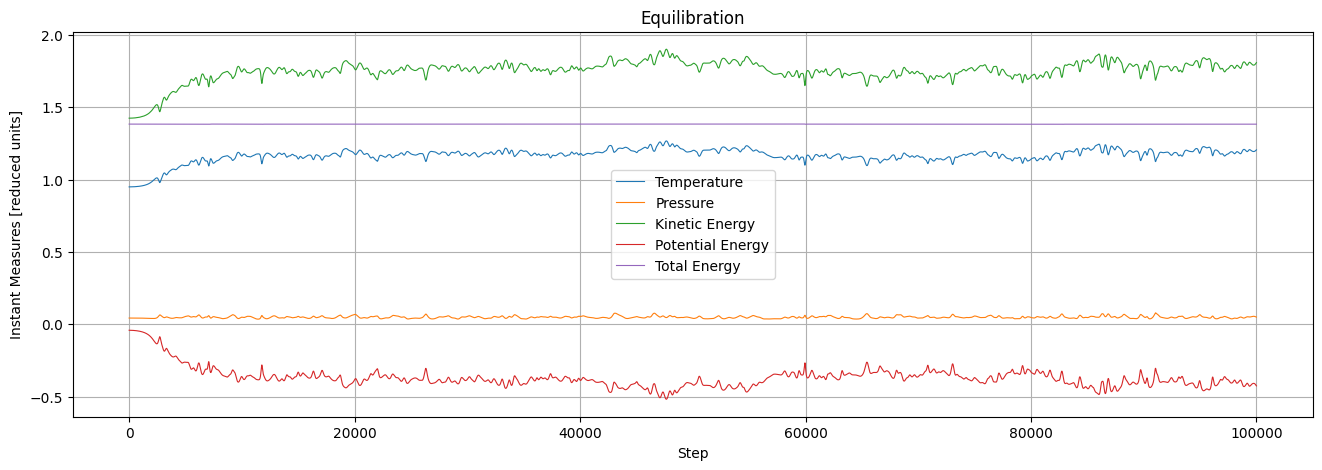

In [87]:
# Carica i dati dal primo file (temperature.dat)
step, stima_temp = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/temperature.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_press = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/pressure.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_kin = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/kinetic_energy.dat", usecols=(0, 1), unpack=True)
# Carica i dati dal secondo file (pressure.dat)
step, stima_pot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/potential_energy.dat", usecols=(0, 1), unpack=True)
# Crea una figura con dimensioni maggiori
# Carica i dati dal secondo file (pressure.dat)
step, stima_tot = np.loadtxt("OUTPUT/EQUILIBRAZIONE/GAS_INITIAL_CONFIG_CHANGED/total_energy.dat", usecols=(0, 1), unpack=True)


plt.figure(figsize=(16, 5))  # Specifica la larghezza e l'altezza della figura in pollici

# Plotta i dati di temperature
plt.plot(step, stima_temp, label='Temperature', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_press, label='Pressure', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_kin, label='Kinetic Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_pot, label='Potential Energy', lw=0.8)
# Plotta i dati di pressure
plt.plot(step, stima_tot, label='Total Energy', lw=0.8)

# Aggiungi etichette e titolo
plt.xlabel('Step')
plt.ylabel('Instant Measures [reduced units]')
plt.title('Equilibration')
plt.grid(True)

# Aggiungi una legenda
plt.legend(loc='center')

# Mostra il grafico
plt.show()

#### Simulazione (partendo da configurazione iniziale reticolo fcc) 

Individuata la condizione iniziale di temperatura $T^{*}_{in}=0.950$ necessaria a raggiungere all'equilibrio $T^{*}=1.2$ ed individuato il tempo di equilibrazione $N_{eq}=40000$ che permetta al sistema di raggiungere l'equilibrio, ho effettuato una simulazione come segue:
- $N_{eq}=40000$ step senza effettuare misure, con il solo scopo di raggiungere l'equilibrio:
  ```cpp
      int t_equilibration = 40000;
      for (int i=0; i<t_equilibration; i++) SYS.step();
- misure suddivise in 20 blocchi da 2000 step ciascuno, a partire dalla configurazione raggiunta al termine della fase di equilibrazione.

Sono mostrati i risultati ottenuti.

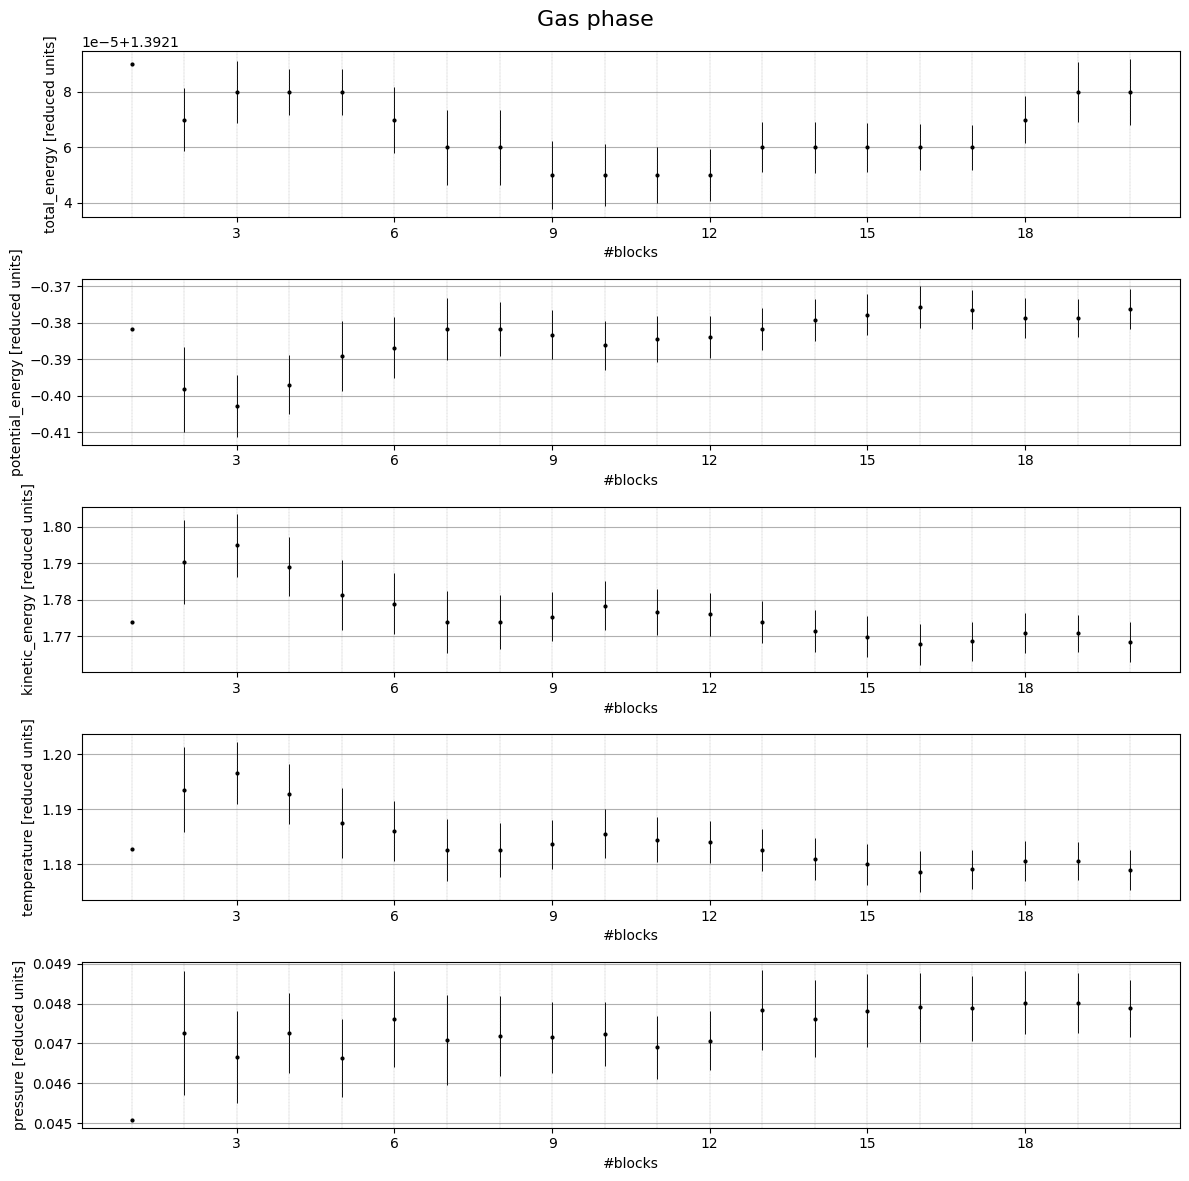

In [89]:
def load_data(file_path):
    blk, data, error = np.loadtxt(file_path, usecols=(0, 2, 3), unpack=True)
    return blk, data, error

# Define file paths
file_paths = ["OUTPUT/GAS/total_energy.dat", 
              "OUTPUT/GAS/potential_energy.dat", 
              "OUTPUT/GAS/kinetic_energy.dat", 
              "OUTPUT/GAS/temperature.dat", 
              "OUTPUT/GAS/pressure.dat"]

# Load data and create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 12))

for i, file_path in enumerate(file_paths):
    blk, data, error = load_data(file_path)
    axs[i].errorbar(blk, data, yerr=error, fmt='o', markersize=2, color='black', ecolor='black', linewidth=0.7)
    axs[i].set_xlabel('#blocks')
    axs[i].set_ylabel(file_path.split('/')[-1].split('.')[0] + ' [reduced units]')
    axs[i].grid(True, axis='y')  # Set grid only on y-axis
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set x-axis to show only integer values
    
    # Add vertical lines on integer values of x-axis
    for value in blk:
        axs[i].axvline(x=value, color='gray', linestyle='--', linewidth=0.2)

fig.suptitle('Gas phase', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

##### Perchè nel caso di fase solida e liquida, la temperatura si alza nella fase di equilibrazione mentre nel caso della fase gassosa diminuisce?

Le simulazioni partono da una configurazione cristallina, che è quindi un minimo dell'energia potenziale. Sciogliendo il sistema, il potenziale aumenta, da cui una diminuzione dell'energia cinetica e quindi della temperatura.

Nel caso gassoso tuttavia, le molecole si trovano in una condizione di densità così bassa, che l'interazione fra le stesse è tale da portare ad una riduzione del potenziale e quindi un aumento dell'energia cinetica.
